<a href="https://colab.research.google.com/github/soobook/TensorFlow-DL/blob/main/code/TF03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3회차: DNN를 활용한 집값 예측 준비

---



In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

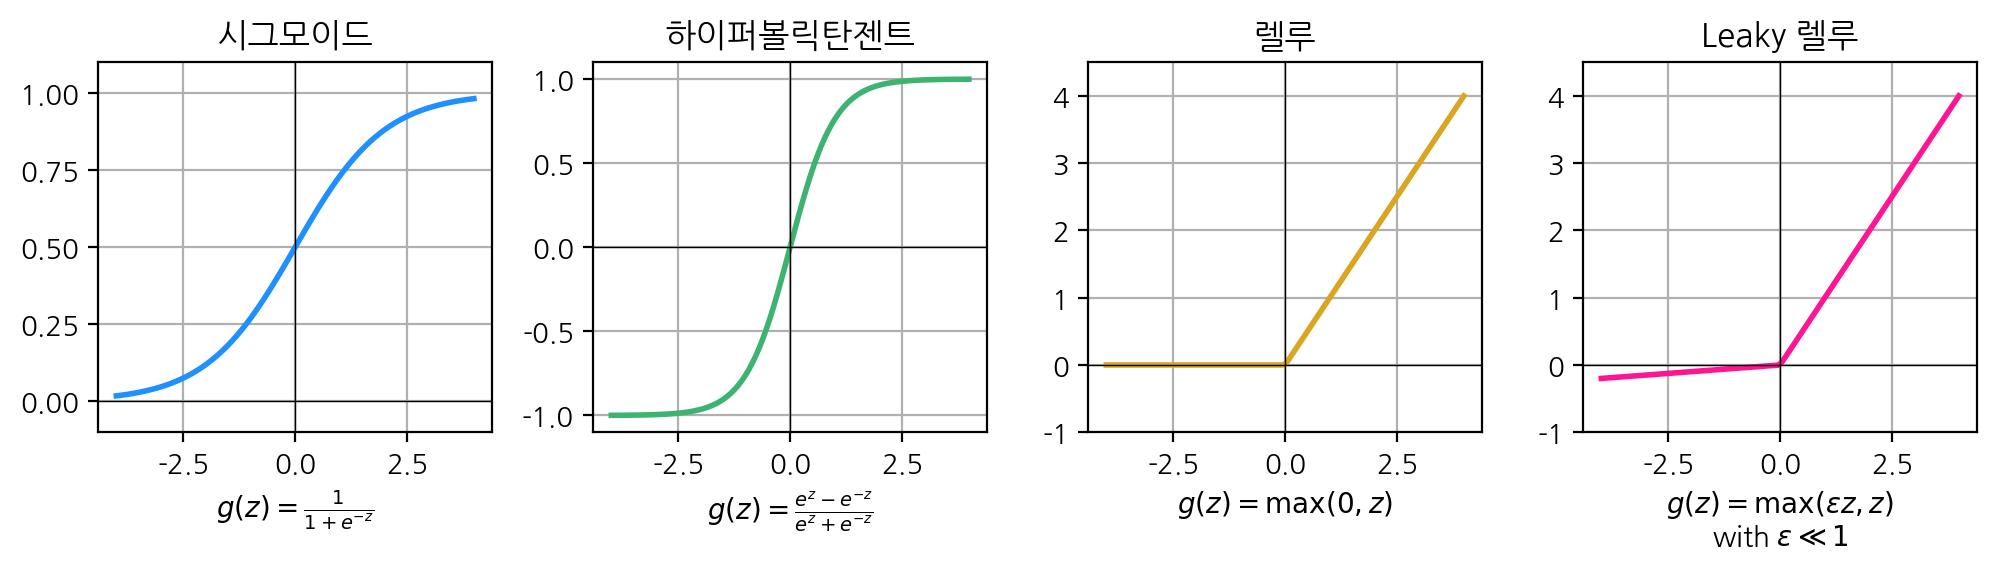

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 범위
z = np.linspace(-4, 4, 100)

# 활성화 함수 정의
sigmoid = lambda z: 1 / (1 + np.exp(-z))
tanh = lambda z: np.tanh(z)
relu = lambda z: np.maximum(0, z)
leaky_relu = lambda z: np.where(z > 0, z, 0.05 * z)

# 스타일 설정
plt.figure(figsize=(10, 3))

# 1. Sigmoid
plt.subplot(1, 4, 1)
plt.plot(z, sigmoid(z), color='dodgerblue', linewidth=2)
plt.title("시그모이드", fontsize=12)
plt.xlabel(r"$g(z) = \frac{1}{1 + e^{-z}}$")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-0.1, 1.1)

# 2. Tanh
plt.subplot(1, 4, 2)
plt.plot(z, tanh(z), color='mediumseagreen', linewidth=2)
plt.title("하이퍼볼릭탄젠트", fontsize=12)
plt.xlabel(r"$g(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-1.1, 1.1)

# 3. ReLU
plt.subplot(1, 4, 3)
plt.plot(z, relu(z), color='goldenrod', linewidth=2)
plt.title("렐루", fontsize=12)
plt.xlabel(r"$g(z) = \max(0, z)$")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-1, 4.5)

# 4. Leaky ReLU
plt.subplot(1, 4, 4)
plt.plot(z, leaky_relu(z), color='deeppink', linewidth=2)
plt.title("Leaky 렐루", fontsize=12)
plt.xlabel(r"$g(z) = \max(\varepsilon z, z)$" + "\n" + r"with $\varepsilon \ll 1$")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-1, 4.5)

# 전체 정렬
plt.tight_layout()
plt.show()

In [20]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets import boston_housing

# 데이터 로드 (train/test 분리된 상태로 제공됨)
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


In [21]:
# pandas에서 소수점 아래 2자리까지만 출력
pd.set_option('display.precision', 2)
# numpy에서 소수점 아래 2자리까지만 출력
np.set_printoptions(precision=2, suppress=True)

In [22]:
print(type(x_train), type(y_train))
print(x_train[:2])
print(y_train[:2])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[  1.23   0.     8.14   0.     0.54   6.14  91.7    3.98   4.   307.
   21.   396.9   18.72]
 [  0.02  82.5    2.03   0.     0.41   7.61  15.7    6.27   2.   348.
   14.7  395.38   3.11]]
[15.2 42.3]


In [24]:
# 특징 이름 13개 수동 입력 (Keras는 컬럼명을 제공하지 않음)
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

# Pandas DataFrame으로 변환
df = pd.DataFrame(x_train, columns=feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [25]:
df['MEDV'] = y_train  # 목표변수 추가
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [26]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,4.04e+02,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.75e+00,11.48,11.10,0.06,0.56,6.27,69.01,3.74,9.44,405.90,18.48,354.78,12.74,22.40
std,9.24e+00,23.77,6.81,0.24,0.12,0.71,27.94,2.03,8.70,166.37,2.20,94.11,7.25,9.21
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,188.00,12.60,0.32,1.73,5.00
25%,8.14e-02,0.00,5.13,0.00,0.45,5.87,45.48,2.08,4.00,279.00,17.23,374.67,6.89,16.68
50%,2.69e-01,0.00,9.69,0.00,0.54,6.20,78.50,3.14,5.00,330.00,19.10,391.25,11.39,20.75
75%,3.67e+00,12.50,18.10,0.00,0.63,6.61,94.10,5.12,24.00,666.00,20.20,396.16,17.09,24.80
max,8.90e+01,100.00,27.74,1.00,0.87,8.72,100.00,10.71,24.00,711.00,22.00,396.90,37.97,50.00


In [27]:
# matplotlib 데이터 시각화의 한글 지원
!pip install koreanize-matplotlib
import koreanize_matplotlib
# matplotlib 데이터 시각화의 선명한 그림
%config InlineBackend.figure_format = 'retina'

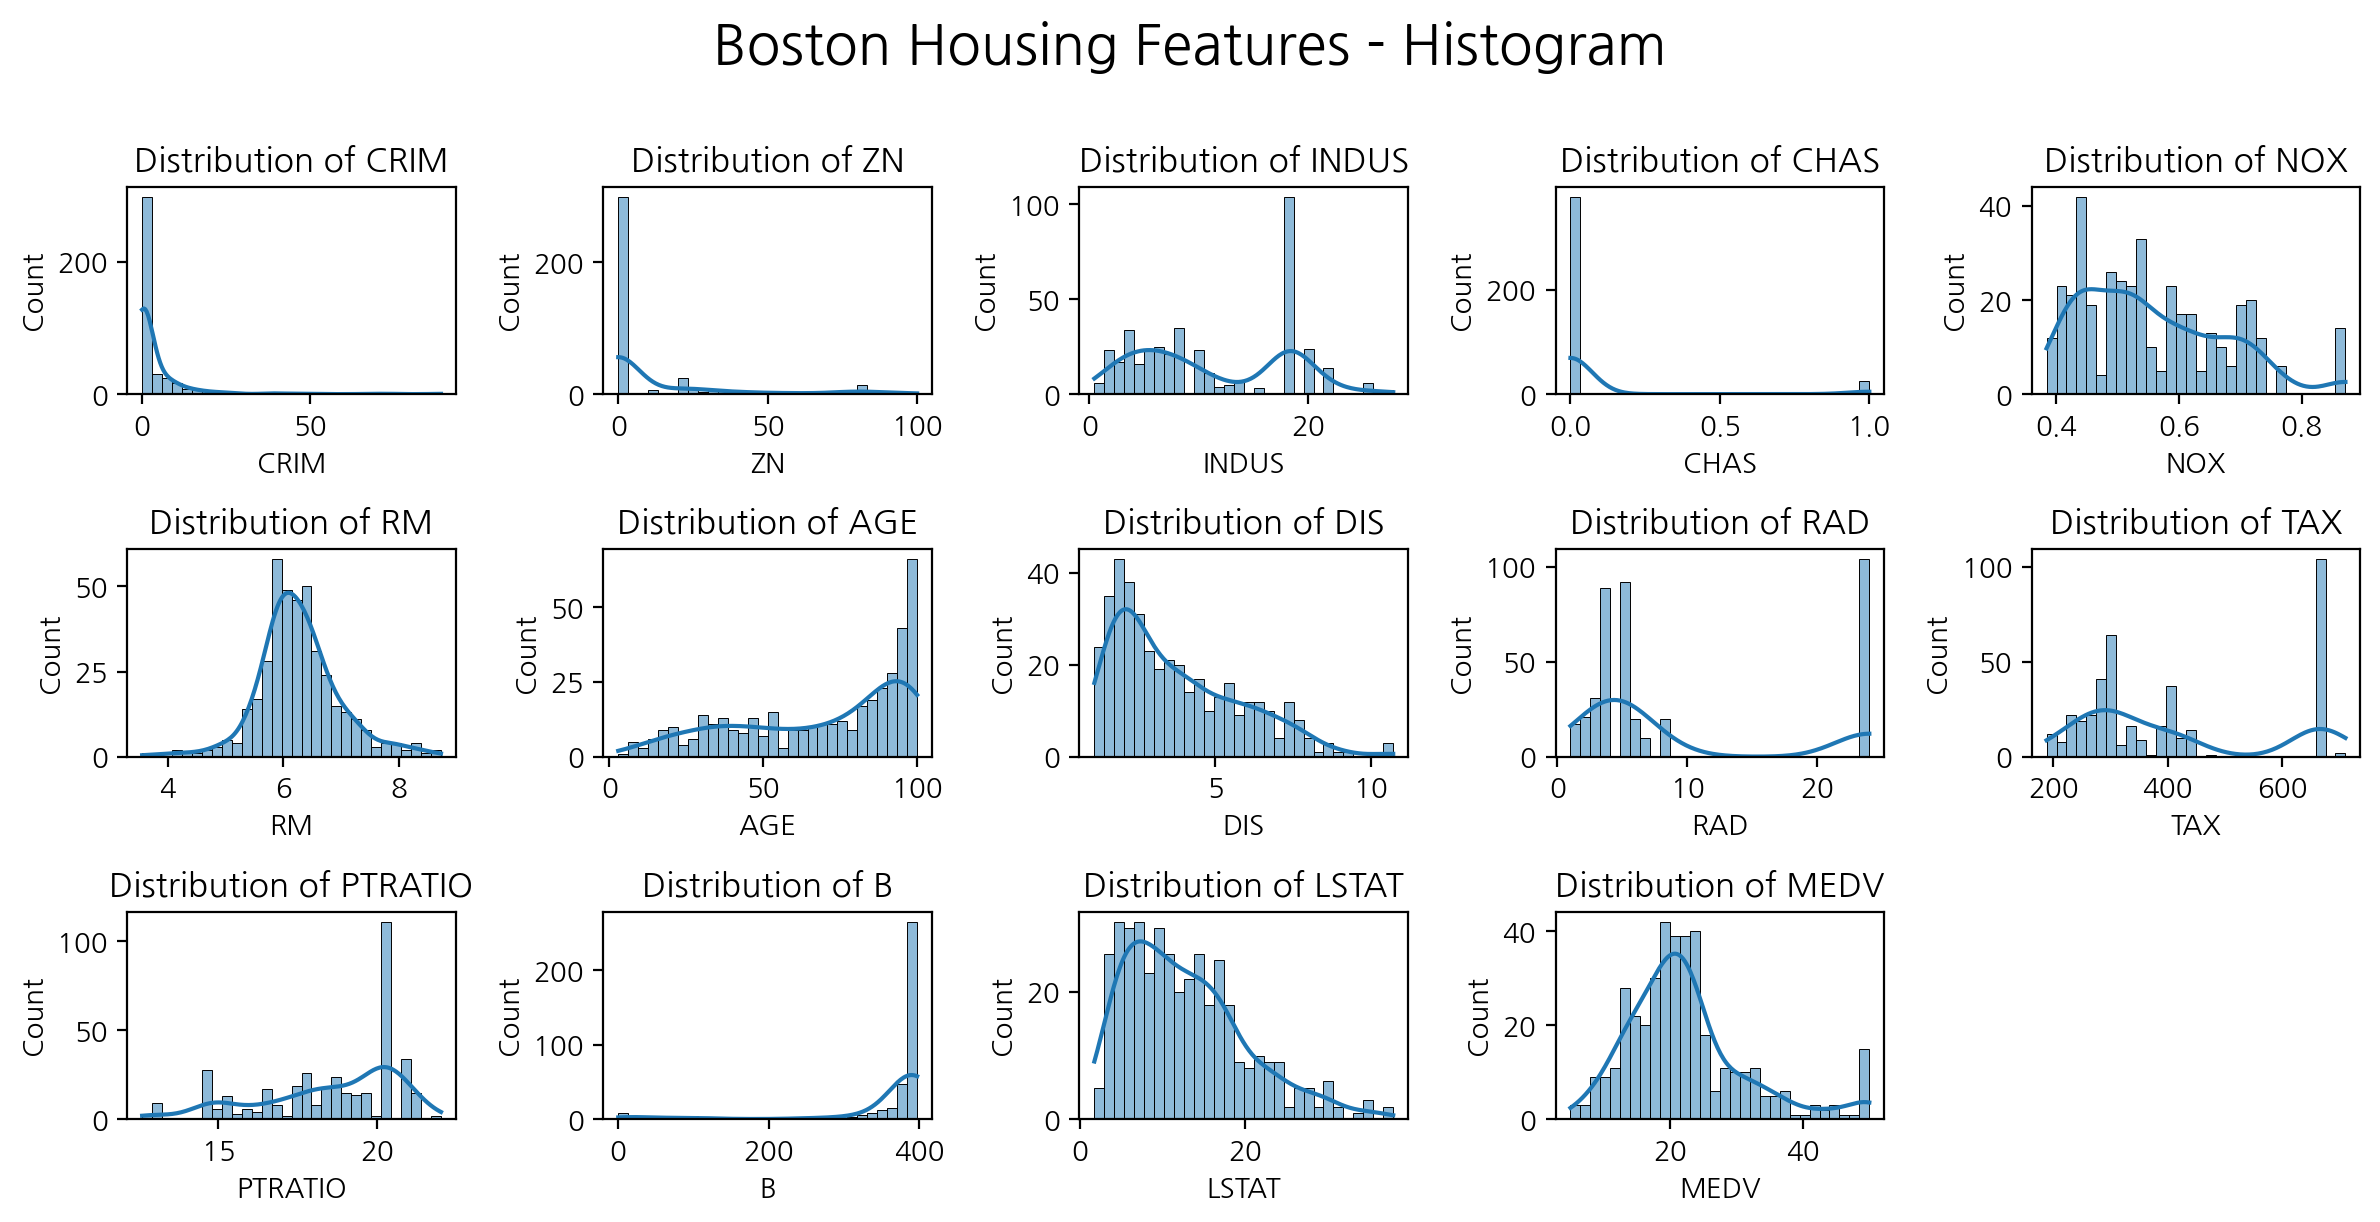

In [14]:
# 1. 히스토그램으로 변수 분포 확인
plt.figure(figsize=(12, 6))
for i, col in enumerate(feature_names + ['MEDV']):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

# 제목 먼저 넣고, 레이아웃은 그 후 조정
plt.suptitle("Boston Housing Features - Histogram", fontsize=20, y=1.01)
# plt.tight_layout(rect=[0, 0, 1, 0.97])  # 전체 subplot 영역 조정
plt.tight_layout()  # 전체 subplot 영역 조정
plt.show()

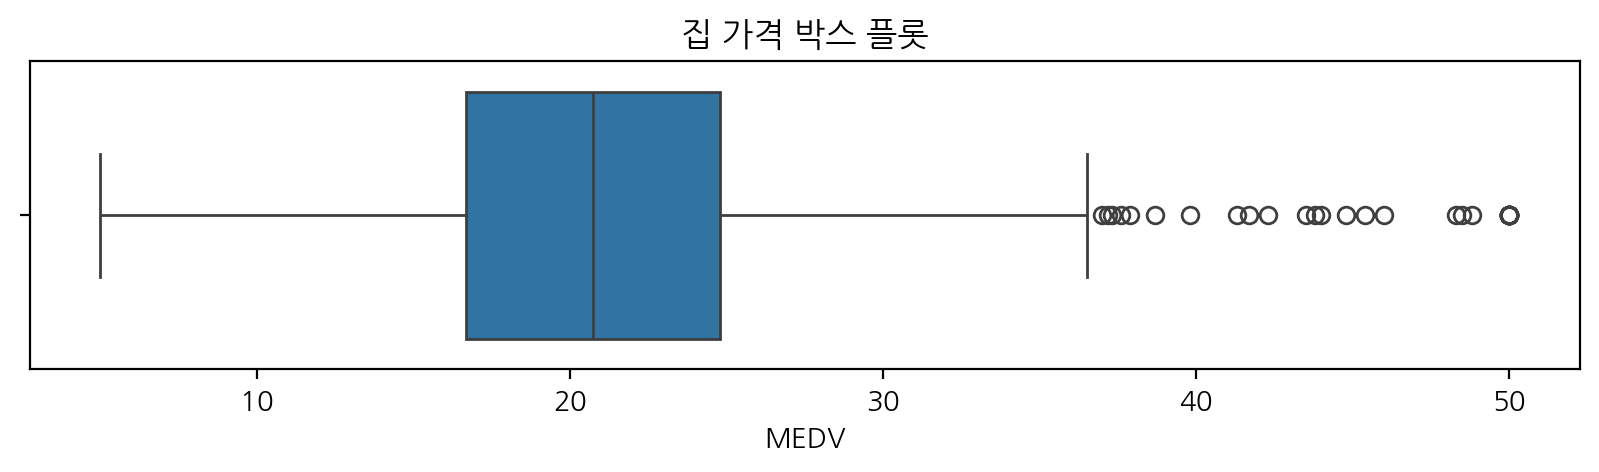

In [15]:
# 2. Boxplot으로 이상치 탐색
plt.figure(figsize=(10, 2))
sns.boxplot(data=df['MEDV'], orient='h')
plt.title("집 가격 박스 플롯")
plt.show()

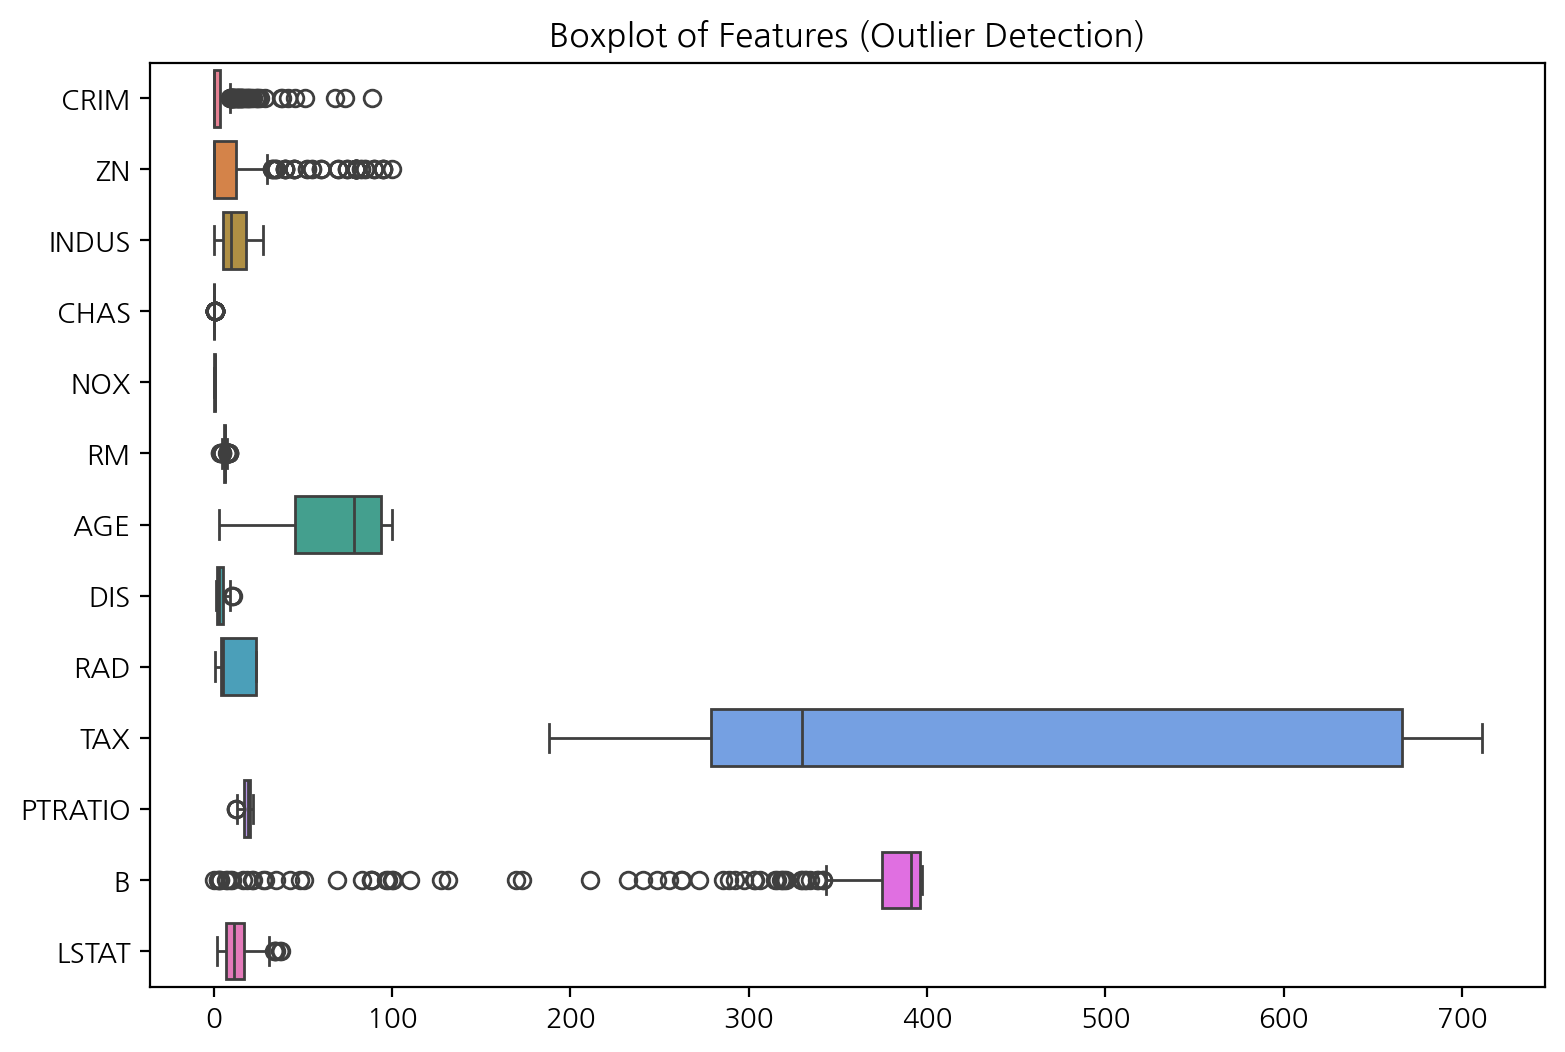

In [28]:
# 2. Boxplot으로 이상치 탐색
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[feature_names], orient='h')
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

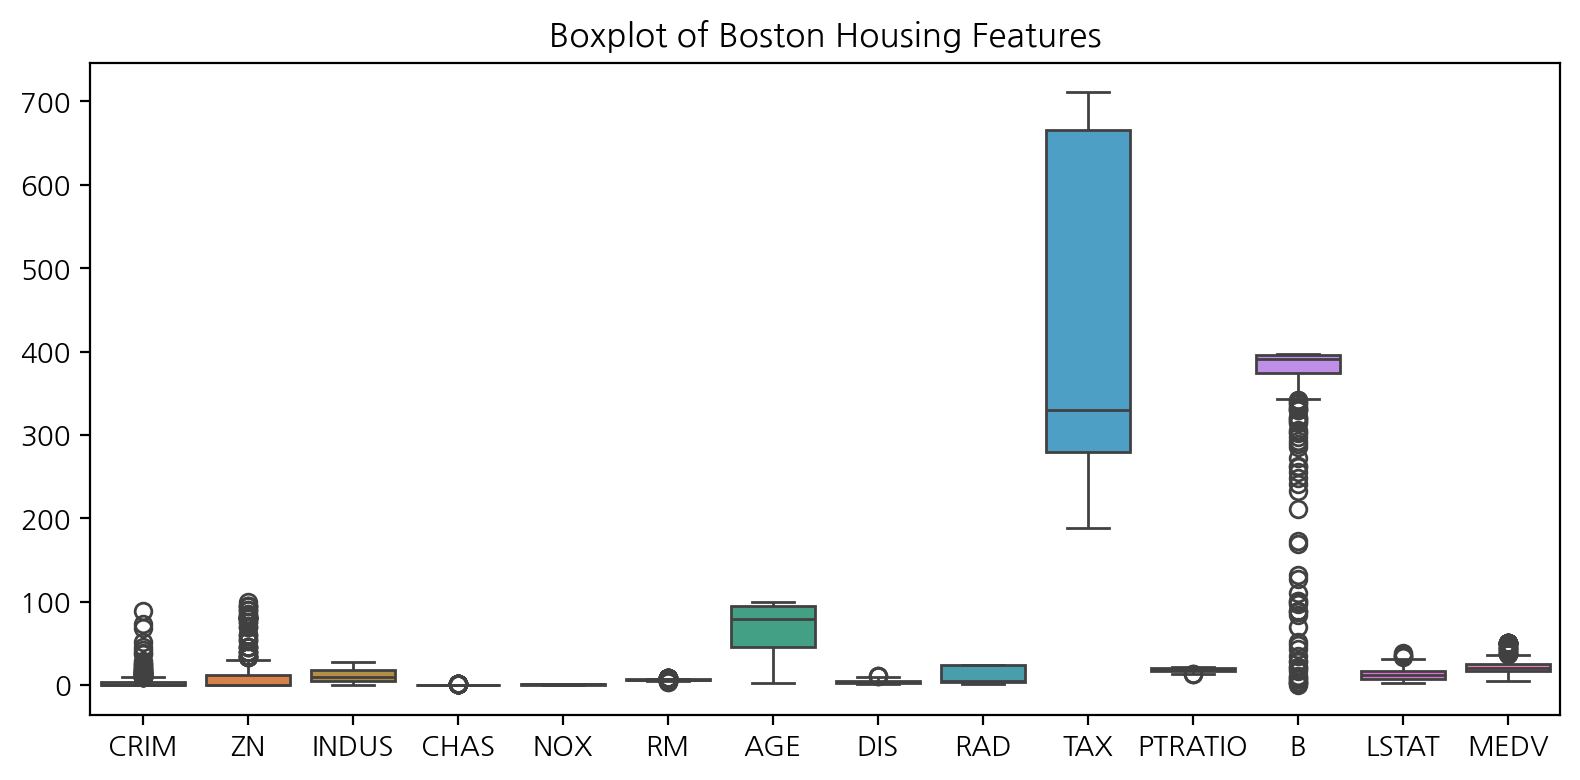

In [29]:
# 1. Boxplot (기초 이상치 탐색)
plt.figure(figsize=(8, 4))
# sns.boxplot(data=df)
sns.boxplot(data=df, orient='v')
plt.title("Boxplot of Boston Housing Features")
plt.tight_layout()
plt.show()

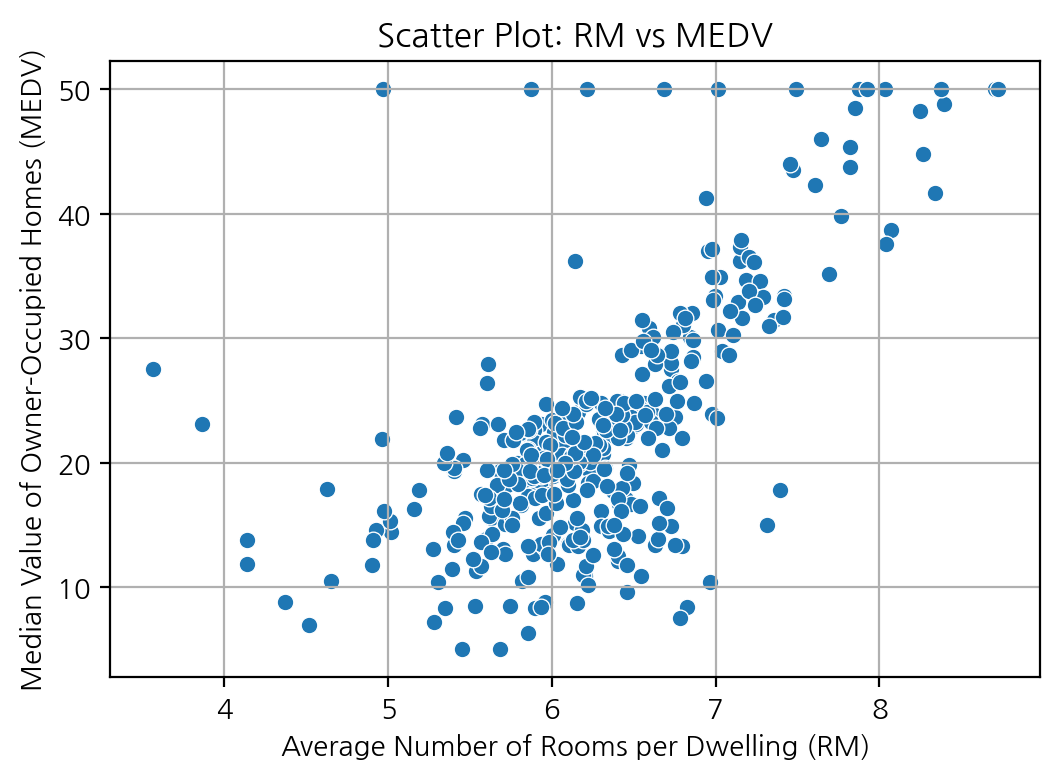

In [ ]:
# RM vs MEDV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title("Scatter Plot: RM vs MEDV")
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Median Value of Owner-Occupied Homes (MEDV)")
plt.grid(True)
plt.show()

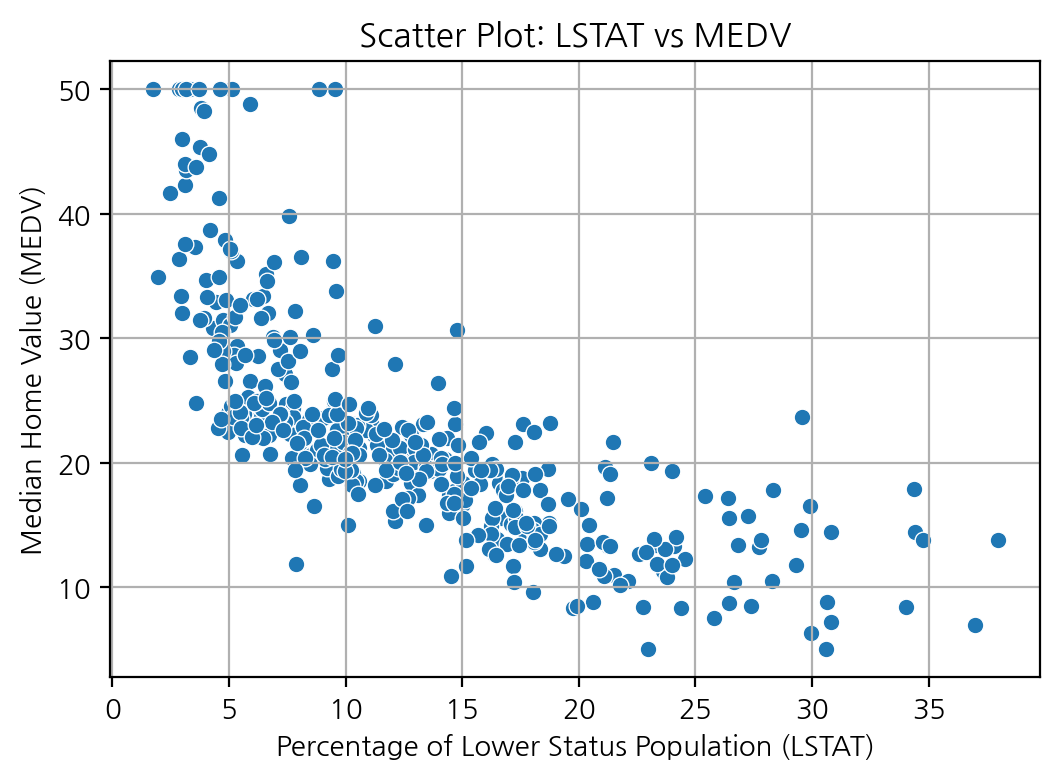

In [ ]:
# LSTAT vs MEDV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title("Scatter Plot: LSTAT vs MEDV")
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Median Home Value (MEDV)")
plt.grid(True)
plt.show()

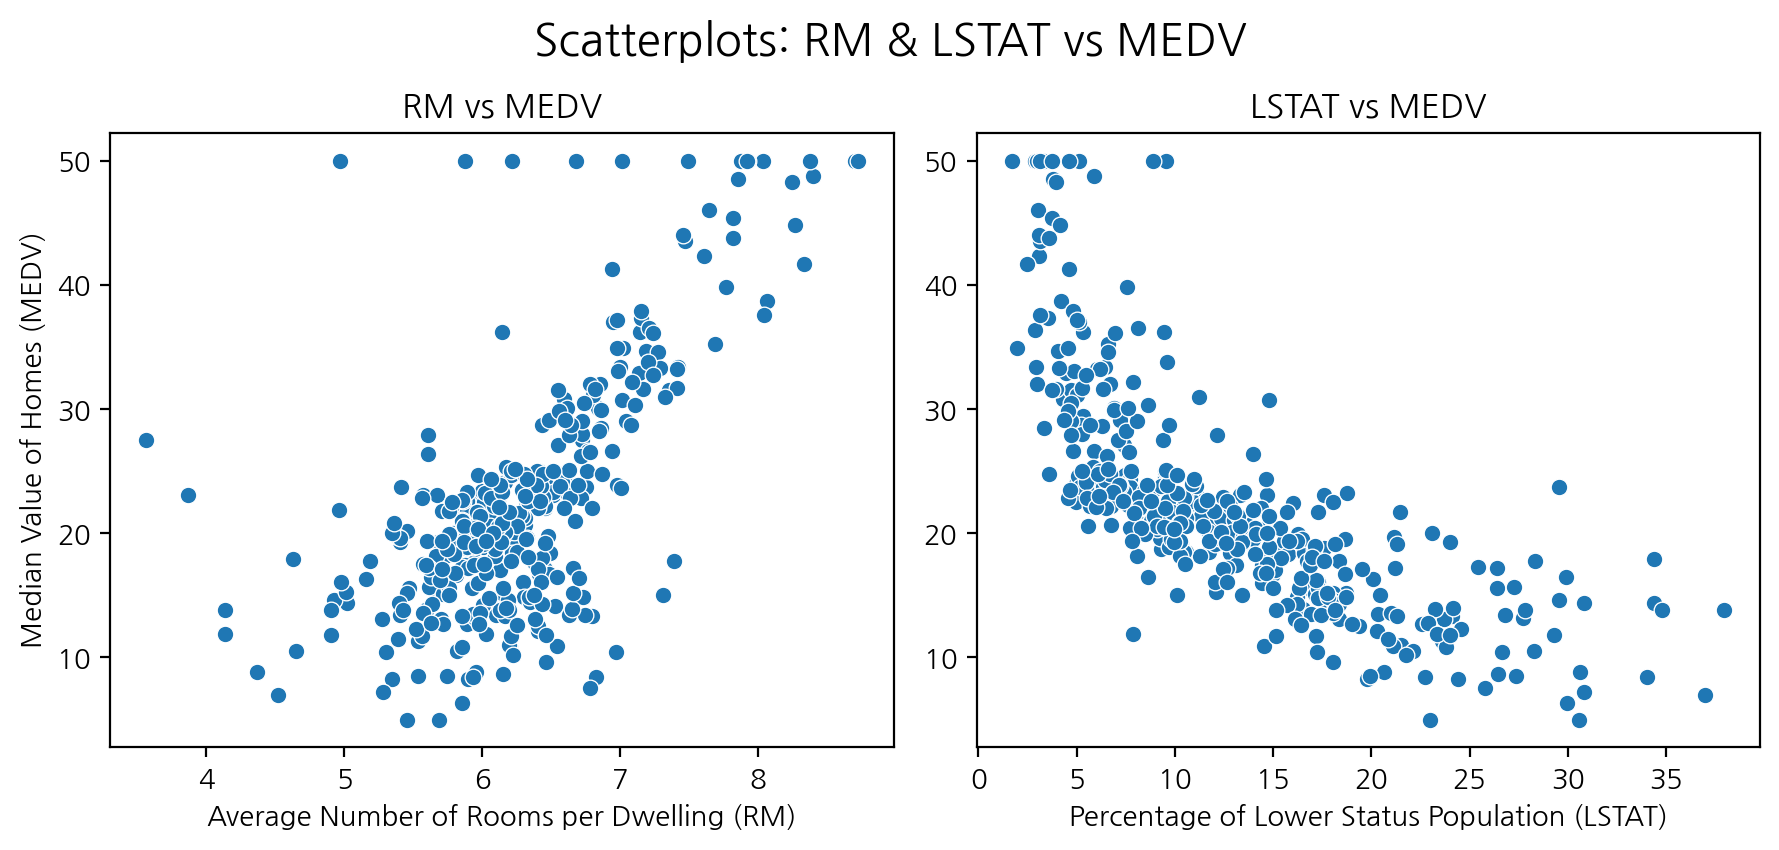

In [ ]:
# subplot 생성
plt.figure(figsize=(9, 4))  # 가로로 넓게

# 1번째 subplot: RM vs MEDV
plt.subplot(1, 2, 1)
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title("RM vs MEDV")
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Median Value of Homes (MEDV)")

# 2번째 subplot: LSTAT vs MEDV
plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title("LSTAT vs MEDV")
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("")  # 오른쪽 subplot은 y축 라벨 생략

plt.tight_layout()
plt.suptitle("Scatterplots: RM & LSTAT vs MEDV", fontsize=16, y=1.05)
plt.show()

### 수업 종료

### 심화 학습

MEDV에 가장 큰 영향을 주는 변수 3개: ['LSTAT', 'RM', 'PTRATIO']


<Figure size 600x600 with 0 Axes>

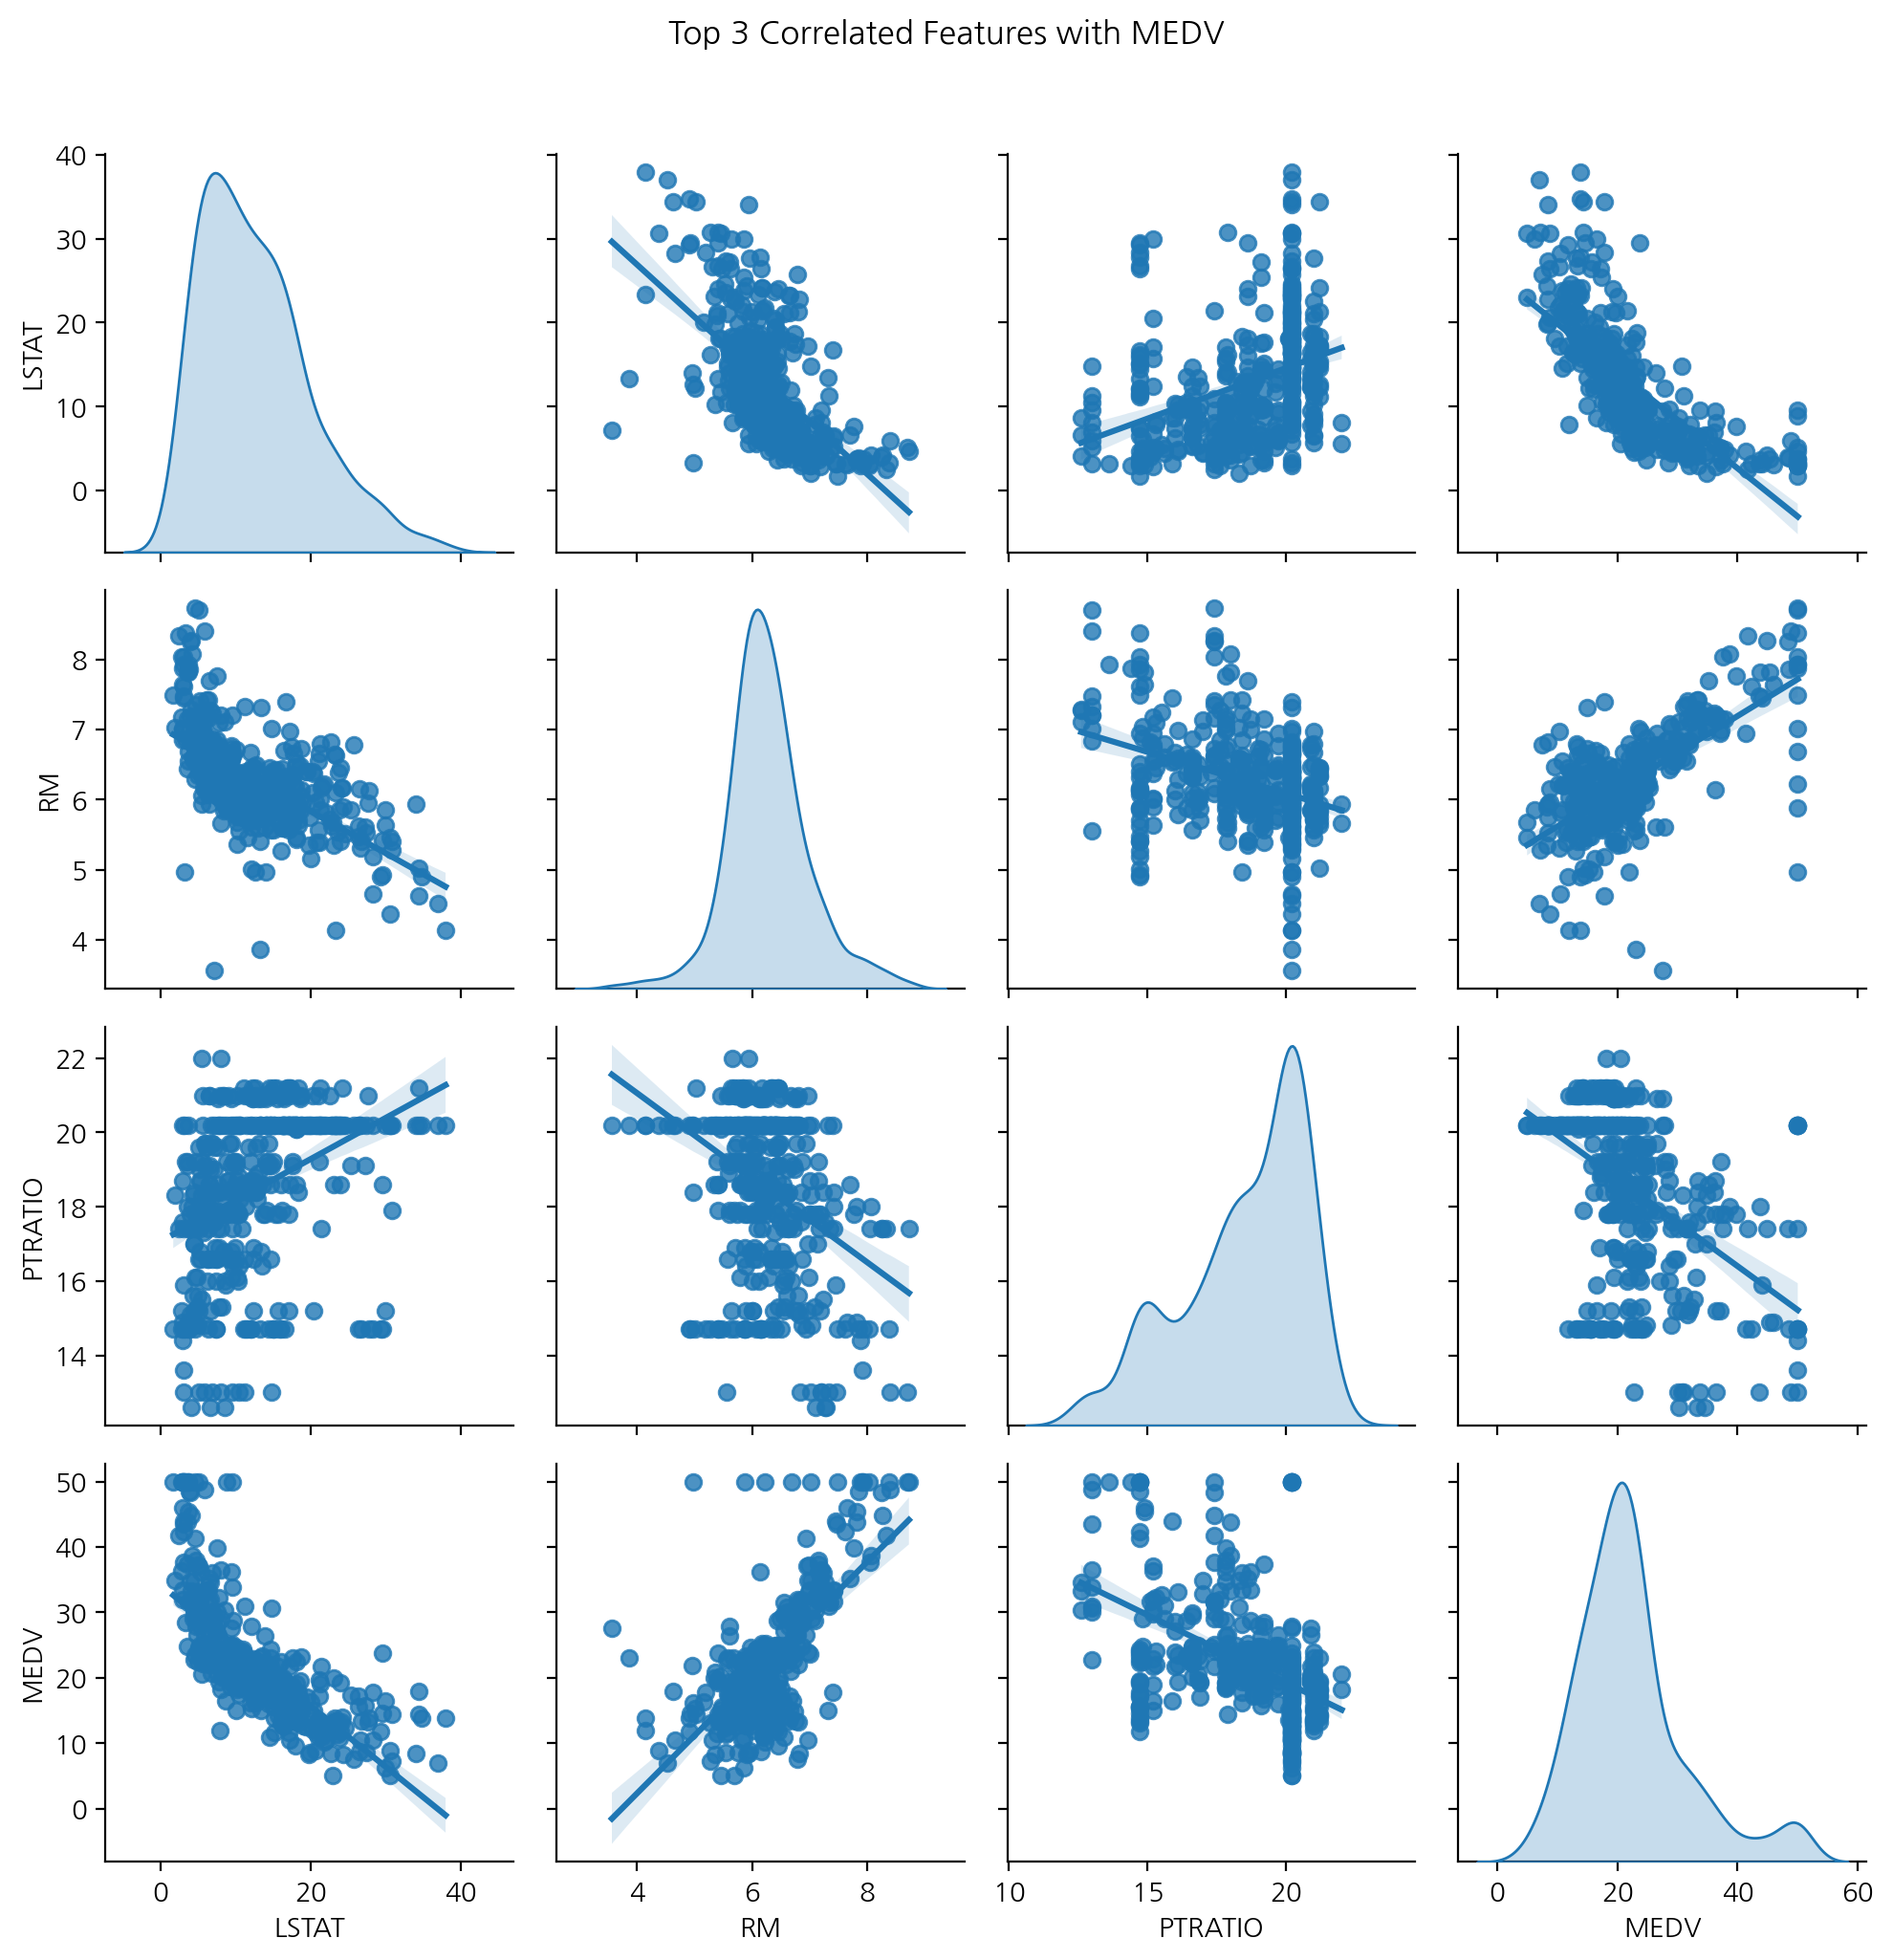

In [ ]:
# 상관계수 계산
corr = df.corr(numeric_only=True)

# MEDV와의 상관계수 상위 3개 변수 추출 (절댓값 기준, MEDV 제외)
top_features = corr['MEDV'].drop('MEDV').abs().sort_values(ascending=False).head(3).index.tolist()

# 출력 확인 (선택된 변수)
print("MEDV에 가장 큰 영향을 주는 변수 3개:", top_features)

# Pairplot 그리기
plt.figure(figsize=(6, 6))  # 가로로 넓게
plot_features = top_features + ['MEDV']  # MEDV 포함
sns.pairplot(df[plot_features], kind='reg', diag_kind='kde')
plt.suptitle("Top 3 Correlated Features with MEDV", y=1.02)
plt.tight_layout()
plt.show()

## 종료